In [1]:
 suppressPackageStartupMessages({
    library(BiocGenerics)
    library(SummarizedExperiment)
    library(tximeta)
    library(rjson)
    library(tximport)
    library(dplyr)
    library(data.table)
    library(ggplot2)
    library(ggrepel)
    library("DESeq2")
    library("tidyr")
    library("tidyr")
    library("tibble")
    library("fgsea")
    library(apeglm)
    library(ggprism)
})


In [2]:
res_table_tb.dt_filt <- fread('../data_and_analyses/RNA/stim_v_WT/stim_v_wt_results.tsv')

gene,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_type,gene_symbol,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000009950,7.1739273,0.44304821,0.6506403,2.007136e-01,4.360367e-01,protein_coding,MLXIPL,NA
ENSG00000068323,1080.0782897,0.75562039,0.1825899,1.590471e-05,3.366096e-04,protein_coding,TFE3,TFE3
ENSG00000069812,29.5461336,-2.01157882,0.7235916,3.667008e-04,5.004971e-03,protein_coding,HES2,HES2
ENSG00000070444,726.0704777,-0.84798212,0.4635045,1.957365e-02,1.062236e-01,protein_coding,MNT,NA
ENSG00000071564,8292.7421153,-0.81702334,0.6048692,4.420856e-02,1.793999e-01,protein_coding,TCF3,NA
ENSG00000072310,2972.1393073,-1.60261775,0.5807607,5.899665e-04,7.391861e-03,protein_coding,SREBF1,SREBF1
ENSG00000090447,366.9620655,-2.01262769,0.2440353,1.596865e-17,1.560807e-15,protein_coding,TFAP4,TFAP4
ENSG00000100644,1286.7128367,0.15676364,0.2277879,4.622899e-01,6.826432e-01,protein_coding,HIF1A,NA
ENSG00000101190,344.2034567,-0.10566760,0.4101380,7.357017e-01,8.650835e-01,protein_coding,TCFL5,NA


Saving 6.67 x 6.67 in image

Warning message:
"Removed 27 rows containing missing values (geom_point)."
Warning message:
"Removed 27 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 27 rows containing missing values (geom_point)."
Warning message:
"Removed 27 rows containing missing values (geom_text_repel)."


mapping: xintercept = ~xintercept 
geom_vline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

null device 
          1

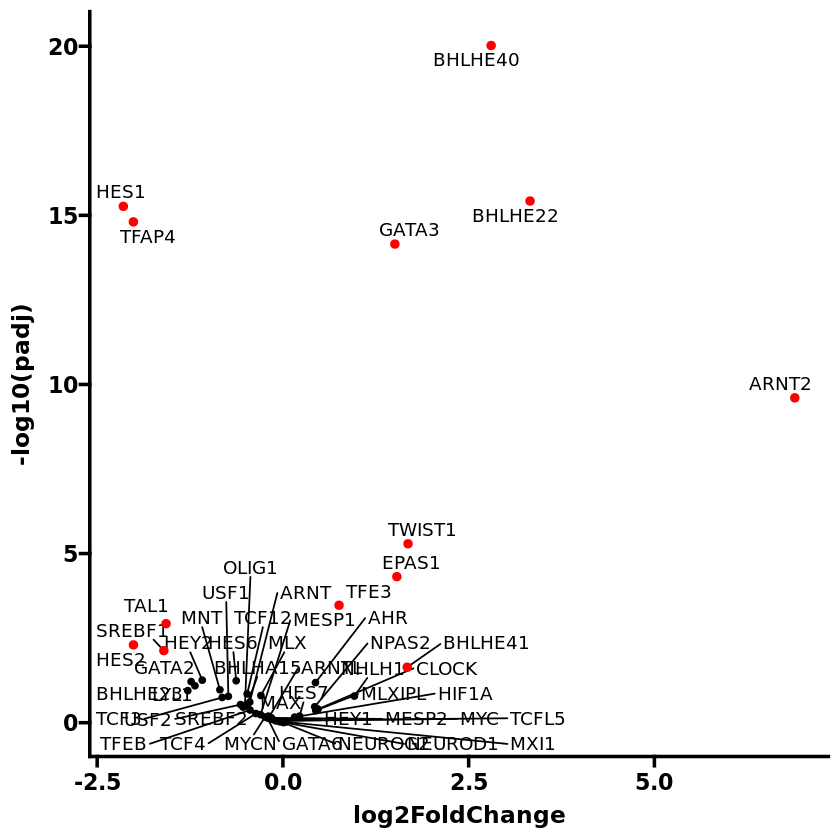

In [4]:
res_table_tb.dt_filt_sig <- filter(res_table_tb.dt_filt,
                                   padj < 0.05)
res_table_tb.dt_filt$gene_name <- ifelse(res_table_tb.dt_filt$gene_symbol %in% res_table_tb.dt_filt_sig$gene_symbol,
                                         res_table_tb.dt_filt$gene_symbol,
                                         res_table_tb.dt_filt$gene_name)
res_table_tb.dt_filt

ggsave('stim_v_ctrl_DE.pdf')
ggplot(res_table_tb.dt_filt, aes(x=log2FoldChange,y=-log10(padj),
                            label=gene_symbol)) + 
    geom_point() + 
    geom_text_repel(max.overlaps=10000) + 
    geom_point(data=res_table_tb.dt_filt_sig, 
             aes(x=log2FoldChange,y=-log10(padj)), 
             color='red',
             size=2) + theme_prism() #+ ylim(0,250) + 
    geom_vline(xintercept=0,linetype="dashed")
dev.off()